In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('transactions_n100000.csv')

In [62]:
data2 = data[['ticket_id','item_name','item_count']]

In [63]:
data_pivot = pd.pivot_table(data2,index=['ticket_id'],columns=['item_name'],values=['item_count'],aggfunc=[np.sum],
                            fill_value=0,margins=1)

In [64]:
pivot = pd.DataFrame({'burger':data_pivot['sum','item_count','burger'],
                      'fries':data_pivot['sum','item_count','fries'],
                      'salad':data_pivot['sum','item_count','salad'],
                      'shake':data_pivot['sum','item_count','shake']})
pivot.drop(['All'],inplace=True)

In [40]:
pivot

,burger,fries,salad,shake
ticket_id,,,,
0x100048,0,3,3,0
0x100057,1,1,0,0
0x1000ba,1,2,1,1
0x1000fb,4,5,1,4
0x10016e,3,3,0,3
...,...,...,...,...
0xffddf,3,3,0,3
0xffe25,2,2,0,0
0xffec9,0,1,1,0


In [65]:
train,test = train_test_split(pivot,random_state=73,test_size=0.2)

# Find K

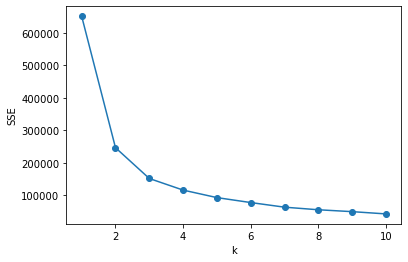

In [66]:
SSE = []
for k in range(1, 11):
    estimator = KMeans(n_clusters=k)
    estimator.fit(train)
    SSE.append(estimator.inertia_)
X = range(1, 11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [67]:
SSE

[651841.3629624946,
 246567.4193336376,
 151607.1987880278,
 115831.3258808351,
 92685.60681830645,
 77418.31962430364,
 63164.27549329284,
 55190.24179854796,
 49376.53027788274,
 42406.65528344244]

set k = 3

# Clustering

In [50]:
model = KMeans(n_clusters=3)
model.fit(train)

KMeans(n_clusters=3)

In [51]:
model.cluster_centers_

array([[3.94001472, 4.08750409, 0.14748937, 3.37213772],
       [1.21097132, 1.49169765, 0.28072633, 0.38302857],
       [0.28701315, 2.88874555, 2.6017324 , 0.11119302]])

In [52]:
train_labels = model.labels_
test_labels = model.predict(test)

# Output

In [60]:
attribute = data.drop_duplicates(keep='first', subset=['ticket_id'])
attribute = attribute.drop(columns=['item_name','item_count'])
attribute.set_index('ticket_id',inplace=True)

In [80]:
train_index = train.index
train_labels = pd.DataFrame(train_labels,index=train_index)
test_index = test.index
test_labels = pd.DataFrame(test_labels,index=test_index)

In [81]:
train_labels['train/test'] = 'Train'
test_labels['train/test'] = 'Test'

In [82]:
labels = pd.concat([train_labels,test_labels])
labels.rename(columns={0:'label'},inplace=True)

In [83]:
output = pd.merge(pivot,attribute,right_index=True,left_index=True,how='inner')
output = pd.merge(output,labels,right_index=True,left_index=True,how='inner')

In [84]:
output

,burger,fries,salad,shake,order_timestamp,location,lat,long,label,train/test
ticket_id,,,,,,,,,,
0x100048,0,3,3,0,2019-03-29 12:24:00,1,41.880844,-87.630524,2,Train
0x100057,1,1,0,0,2019-11-24 00:24:00,6,41.784576,-87.607565,1,Train
0x1000ba,1,2,1,1,2019-02-09 12:02:00,5,41.881818,-87.640234,1,Train
0x1000fb,4,5,1,4,2019-08-31 19:28:00,4,41.889047,-87.803605,0,Train
0x10016e,3,3,0,3,2019-09-13 17:07:00,7,41.794132,-88.010140,0,Train
...,...,...,...,...,...,...,...,...,...,...
0xffddf,3,3,0,3,2019-05-27 18:07:00,4,41.889047,-87.803605,0,Test
0xffe25,2,2,0,0,2019-12-16 00:30:00,6,41.784576,-87.607565,1,Test
0xffec9,0,1,1,0,2019-07-04 13:30:00,1,41.880844,-87.630524,1,Train


In [85]:
output.to_csv('output.csv')